<a href="https://colab.research.google.com/github/nalinis07/APT_Proj_Ref_copy/blob/MASTER/AT_Lesson_69_Project_Solution_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Car Prediction - Feature Encoding




---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the price of diamonds on the basis of various factors such as its cut, color, clarity, depth etc.

---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Data Preparation

**Activity 3:** Feature Encoding

**Activity 4:** Train-Test Split

**Activity 5:** Model Training using `statsmodels.api`






---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Diamonds** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|carat|weight of the diamond|
|cut|quality of the cut|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y)|
|table|The width of the diamond's table expressed as a percentage of its average diameter|
|price|price in US dollars|
|x|length in mm|
|y|width in mm|
|z|depth in mm|


  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Remove the unnecessary column `Unnamed: 0` as it is of no use.



In [ ]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df =pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv")
# Print first five rows using head() function
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

NameError: ignored

In [ ]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Drop 'Unnamed: 0' column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


---

#### Activity 2: Data Preparation

Extract numerical attributes from the dataset and create a heatmap to identify correlation among various numerical attributes.

In [ ]:
# Extract all the numeric (float and int type) columns from the dataset.
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
df_numeric.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


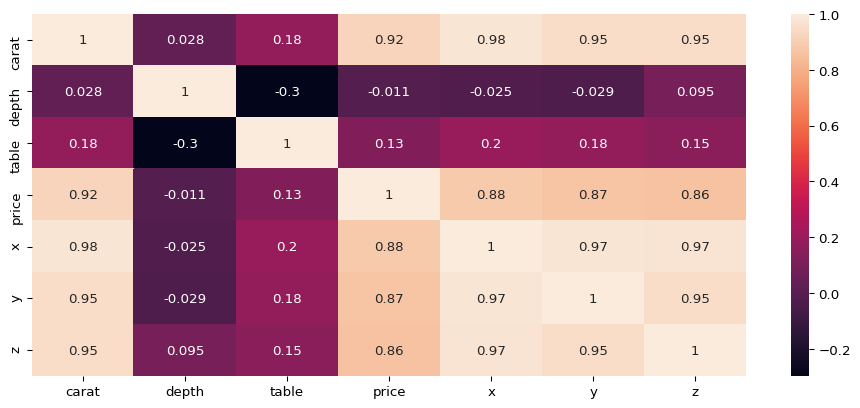

In [ ]:
# Create a correlation heatmap between the numeric features.
plt.figure(figsize = (12, 5), dpi = 96)
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

**Q:** Which features are highly correlated with `price`?

**A:** `carat`, `x`, `y` and `z`.

**Q:** Is there multicollinearity in the dataset?

**A:** Yes, as many features are highly correlated with each other. Some of them are:
- `depth` is inversely related to `table`.
- `carat`, `x`, `y` and `z` are highly correlated with each other.



---

#### Activity 3: Feature Encoding

The dataset contains certain columns that are categorical. However for linear regression, we need all numerical variables. Perform **one-hot encoding** to obtain numeric values from non-numeric categorical values.


In [ ]:
# Create a new dataframe having dummy variables for all the categorical type columns of the dataset using 'get_dummies()' function.
df_dummies = pd.get_dummies(df, dtype = int)
df_dummies.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Print the information of the new dataframe obtained after one-hot encoding
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  int64  
 8   cut_Good       53940 non-null  int64  
 9   cut_Ideal      53940 non-null  int64  
 10  cut_Premium    53940 non-null  int64  
 11  cut_Very Good  53940 non-null  int64  
 12  color_D        53940 non-null  int64  
 13  color_E        53940 non-null  int64  
 14  color_F        53940 non-null  int64  
 15  color_G        53940 non-null  int64  
 16  color_H        53940 non-null  int64  
 17  color_I        53940 non-null  int64  
 18  color_

----

#### Activity 4: Train-Test Split

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_dummies, test_size = 0.3, random_state = 42)

In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
features = list(df_dummies.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

---

#### Activity 5: Model Training using `statsmodels.api`

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [ ]:
#  Build a linear regression model using all the features
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()
lin_reg.params

const             3875.131343
carat            11226.205118
depth              -63.119911
table              -27.096056
x                 -980.549238
y                   -5.633153
z                  -48.154764
cut_Fair           182.468537
cut_Good           777.989617
cut_Ideal         1028.664794
cut_Premium        960.238499
cut_Very Good      925.769897
color_D           1388.904745
color_E           1171.875777
color_F           1115.600769
color_G            888.744507
color_H            390.270076
color_I            -87.179488
color_J           -993.085043
clarity_I1       -3405.218347
clarity_IF        2053.818953
clarity_SI1        346.491324
clarity_SI2       -623.277799
clarity_VS1       1252.615960
clarity_VS2        931.507236
clarity_VVS1      1696.116834
clarity_VVS2      1623.077183
dtype: float64

In [ ]:
# Print the summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.876e+04
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:02:24   Log-Likelihood:            -3.1921e+05
No. Observations:               37758   AIC:                         6.385e+05
Df Residuals:                   37734   BIC:                         6.387e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3875.1313    320.935     12.075




**Q:** What is the Adjusted $R^2$ value?

**A:** 0.92




---